# Hedvig Insurance Claims: EDA, UMAP & Cluster Analysis

**Author:** Sinah Behsangar  
**Objective:** Analyze auto insurance claims to uncover patterns in fraud, visualize claim clusters using UMAP, and profile behaviors by cluster to support better decision-making at Hedvig.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import umap
from sklearn.cluster import KMeans

# Set consistent color palette
cluster_palette = sns.color_palette('tab10', 4)


c:\Users\Sinah\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load and Prepare the Data

In [2]:
df = pd.read_csv('../Data/raw/insurance_claims.csv')
df = df.drop(columns=['_c39'], errors='ignore')
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0}) if df['fraud_reported'].dtype == 'object' else df['fraud_reported']
df = df.dropna(subset=['fraud_reported'])

## Exploratory Data Analysis (EDA)

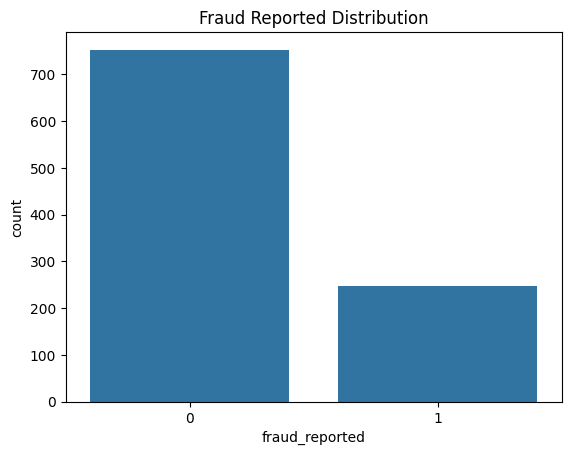

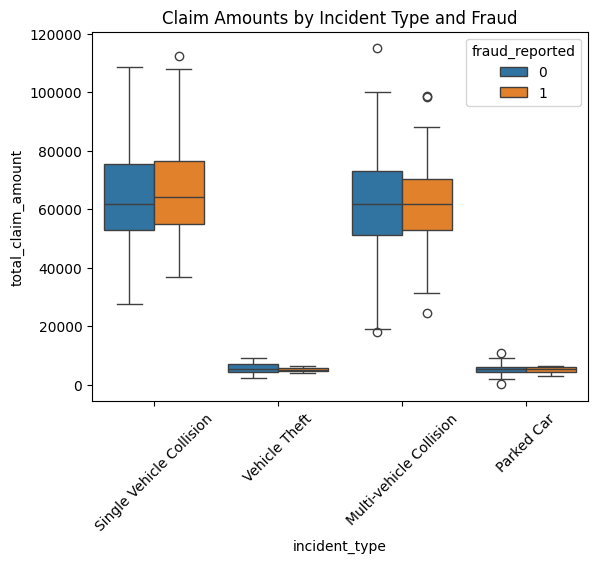

In [3]:
# Fraud distribution
sns.countplot(x='fraud_reported', data=df)
plt.title('Fraud Reported Distribution')
plt.show()

# Claim amounts by incident type
sns.boxplot(x='incident_type', y='total_claim_amount', hue='fraud_reported', data=df)
plt.title('Claim Amounts by Incident Type and Fraud')
plt.xticks(rotation=45)
plt.show()


## Feature Encoding and UMAP Embedding

In [4]:
categorical_cols = ['incident_type', 'collision_type', 'auto_make', 'policy_state']
numerical_cols = ['total_claim_amount', 'policy_annual_premium', 'umbrella_limit',
                  'number_of_vehicles_involved', 'bodily_injuries', 'witnesses']

df_model = df[categorical_cols + numerical_cols + ['fraud_reported']].dropna()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

X = preprocessor.fit_transform(df_model)
y = df_model['fraud_reported'].values

reducer = umap.UMAP(random_state=42, min_dist=0.1)
embedding = reducer.fit_transform(X)


c:\Users\Sinah\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


## UMAP Projection of Claims

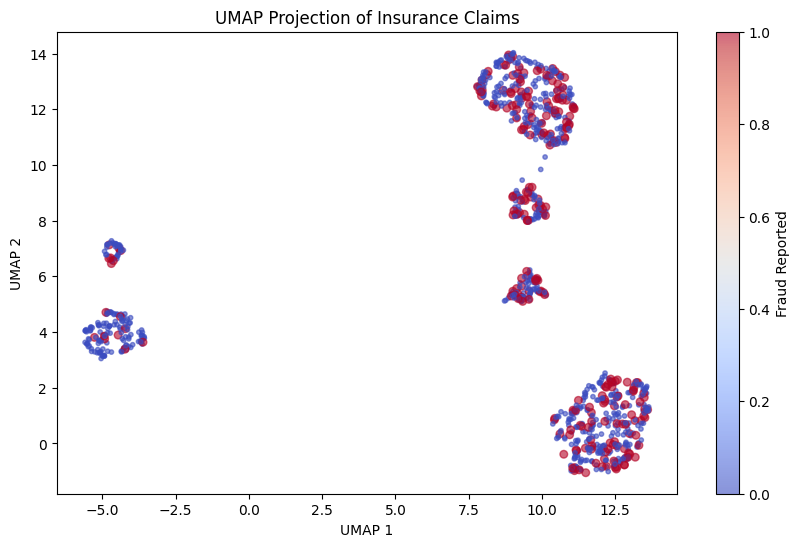

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='coolwarm', alpha=0.6, s=10 + 20*y)
plt.colorbar(label='Fraud Reported')
plt.title('UMAP Projection of Insurance Claims')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


## KMeans Clustering on UMAP Embeddings

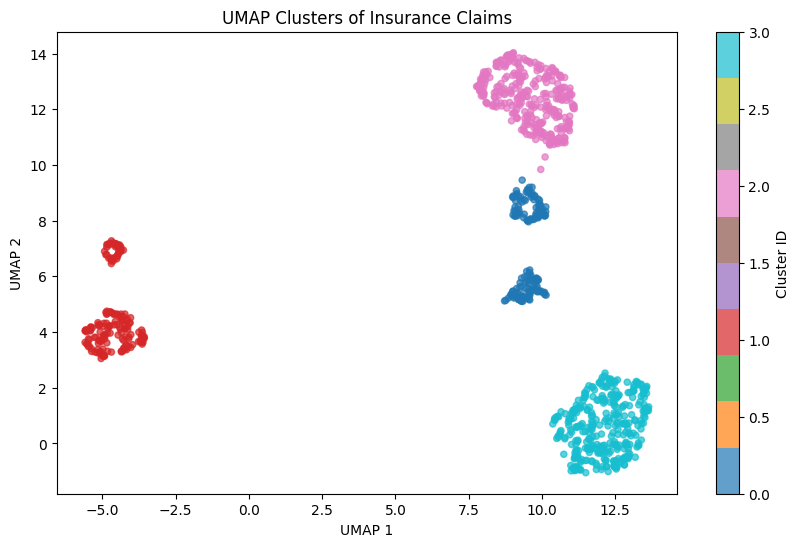

In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(embedding)
df_model['cluster'] = clusters

plt.figure(figsize=(10,6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, cmap='tab10', s=20, alpha=0.7)
plt.title('UMAP Clusters of Insurance Claims')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Cluster ID')
plt.show()


## Cluster Profiles by Key Categorical Features

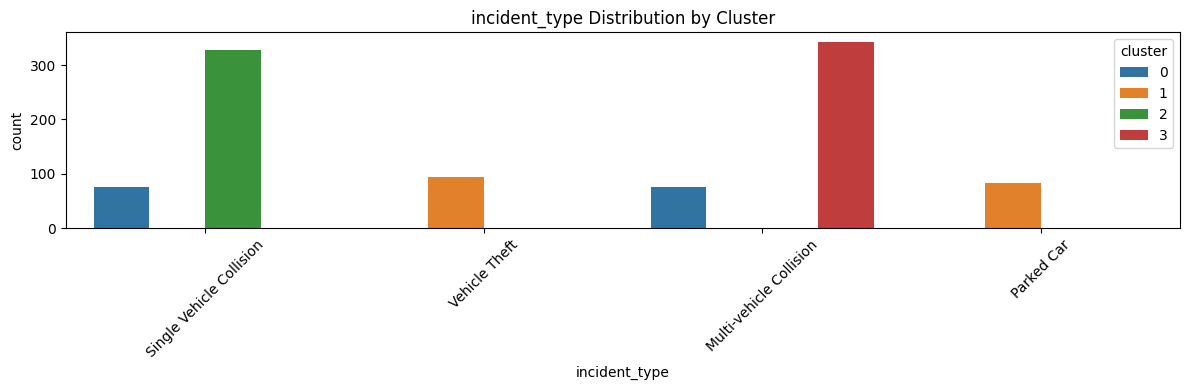

In [7]:
plt.figure(figsize=(12,4))
sns.countplot(data=df_model, x='incident_type', hue='cluster', palette=cluster_palette)
plt.title('incident_type Distribution by Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


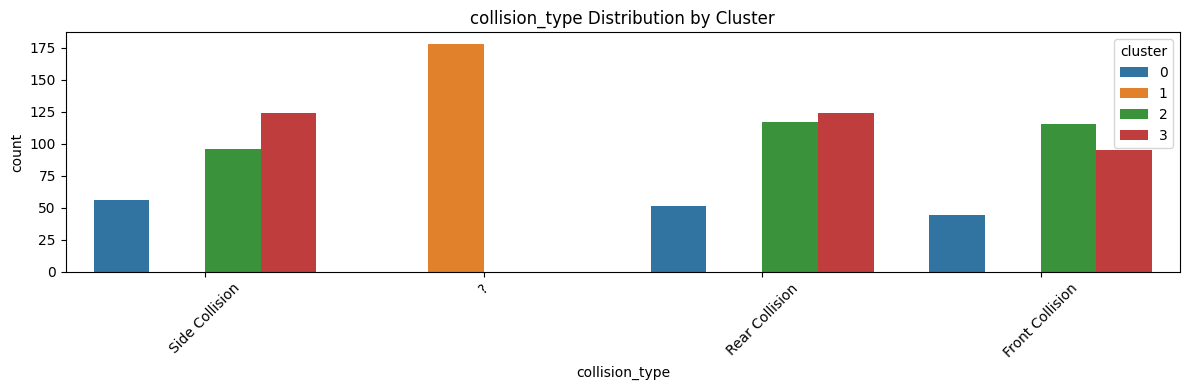

In [8]:
plt.figure(figsize=(12,4))
sns.countplot(data=df_model, x='collision_type', hue='cluster', palette=cluster_palette)
plt.title('collision_type Distribution by Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


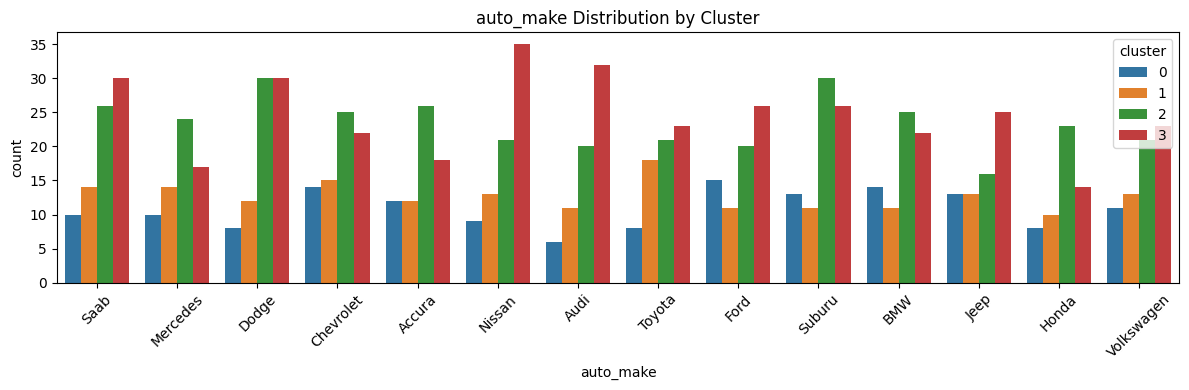

In [9]:
plt.figure(figsize=(12,4))
sns.countplot(data=df_model, x='auto_make', hue='cluster', palette=cluster_palette)
plt.title('auto_make Distribution by Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
